In [1]:
from mrcnn import model as modellib, utils
from mrcnn.config import Config
import os
import warnings

warnings.filterwarnings('ignore')

Using TensorFlow backend.
C:\Users\jatin\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
class BuildingConfig(Config):
    """Configuration for training on data in MS COCO format.
    Derives from the base Config class and overrides values specific
    to the COCO dataset.
    """
    # Give the configuration a recognizable name
    NAME = "OSM_buildingdetector"

    # We use a GPU with 12GB memory, which can fit two images.
    # Adjust down if you get "ResourceExhaustedError" while running training
    IMAGES_PER_GPU = 2

    # Uncomment to train on 8 GPUs (default is 1)
    GPU_COUNT = 1

    # Number of classes (including background)
    NUM_CLASSES = 1 + 1  # 1 Backgroun + 1 Building

    STEPS_PER_EPOCH=1000
    VALIDATION_STEPS=50


    IMAGE_MAX_DIM=320
    IMAGE_MIN_DIM=320

In [11]:
MODEL_DIR = ''
ROOT_DIR = ''

In [58]:
class InferenceConfig(BuildingConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Get path to saved weights
# Either set a specific path or find last trained weights
model_path = os.path.join(ROOT_DIR, "weights/pretrained_weights.h5")

# Load trained weights
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Loading weights from  weights/pretrained_weights.h5


In [5]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [6]:
im = Image.open('osm_images/tmp.PNG')
im = im.resize((320,320), Image.ANTIALIAS)

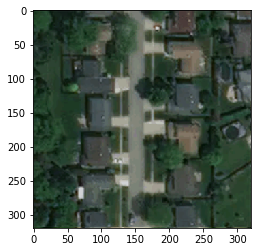

In [7]:
plt.imshow(np.array(im)[:,:,:3])

In [8]:
import imageio

In [9]:
def plot_mask(masks, labels):
    if masks is None: # just an empty plot
        plt.imshow(np.zeros([512,512,3]).astype(np.uint8))
        return
    net_image = np.zeros([masks.shape[0],masks.shape[1],3])
    assert masks.shape[-1] == len(labels)
    for i in range(masks.shape[2]):
        m = masks[:,:,i].astype(np.uint8)[:,:,None]
        mask = np.append(m,m,axis=2)
        mask = np.append(mask,m,axis=2)
        if labels[i] == 'building':
            mask = mask * np.array([25,160,90]) # yellow for corn
        net_image += mask
    plt.imshow(net_image.astype(np.uint8))

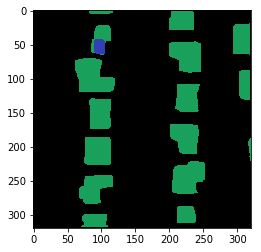

In [10]:
im = Image.open('osm_images/tmp.PNG')
im = im.resize((320,320), Image.ANTIALIAS)
out = model.detect([imageio.core.util.Array(np.array(im)[:,:,:3])])
plot_mask(out[0]['masks'], ['building' for _ in range(out[0]['masks'].shape[-1])]) # it works!!

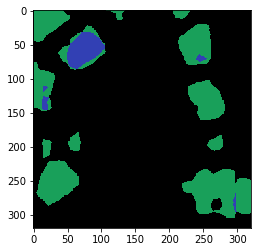

In [11]:
im = Image.open('osm_images/tmp4.PNG')
im = im.resize((320,320), Image.ANTIALIAS)
out = model.detect([imageio.core.util.Array(np.array(im)[:,:,:3])])
plot_mask(out[0]['masks'], ['building' for _ in range(out[0]['masks'].shape[-1])])

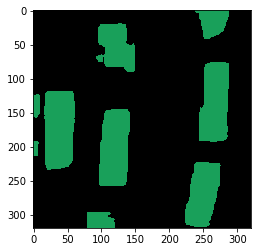

In [111]:
im = Image.open('click_original.png')
im = im.resize((320,320), Image.ANTIALIAS)
out = model.detect([imageio.core.util.Array(np.array(im)[:,:,:3])])
plot_mask(out[0]['masks'], ['building' for _ in range(out[0]['masks'].shape[-1])])

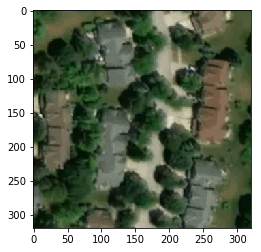

In [112]:
plt.imshow(im)